In [82]:
import pandas as pd
from src.recommender import Recommender
from src.models import iiCB, Ridge_iiCB
from src.utils import get_items_rated_by_user

df = pd.read_csv('data\captone_data.csv')
recommender_engine = Recommender(df)
model = Ridge_iiCB(df)


Recommender is ready.


In [83]:
model.train(recommender_engine.item_vectors)

KeyboardInterrupt: 

In [ ]:
model.predict('DB0115EN', 1889878)
# print(rid.predict('LB0101ENv1', 2))
# print(rid.reccomend('LB0101ENv1', 10, return_rating=True))

np.float64(3.0)

In [ ]:
model.reccomend(1889878, 10, return_rating=True)

[('CL0101EN', 3.0),
 ('ML0120ENv3', 3.0),
 ('ST0101EN', 3.0),
 ('DS0105EN', 3.0),
 ('BD0141EN', 3.0),
 ('CO0201EN', 3.0),
 ('BD0123EN', 3.0),
 ('TA0105EN', 3.0),
 ('BD0111EN', 3.0),
 ('ML0122ENv1', 3.0)]

In [ ]:
items = df['item'].unique()
user = 1889878

rated_items = set(df[df['user'] == user]['item'])
all_items = list(items)
unrated_items = [item for item in all_items if item not in rated_items]

print(rated_items)
print(all_items)
print(unrated_items)

item_scores = [(item, float(model.predict(item, user)), len(df[df['item'] == item])) for item in unrated_items]
item_scores.sort(key=lambda x: (x[1], x[2]), reverse=True)
item_scores


{'RP0105EN', 'ML0115EN', 'ML0151EN', 'CC0101EN', 'BC0202EN', 'BC0101EN', 'HCC104EN', 'DV0101EN', 'BC0201EN', 'AI0111EN', 'BD0101EN', 'CC0250EN', 'BD0211EN', 'PY0101EN', 'ML0120ENv2', 'DV0151EN', 'DS0103EN', 'CC0103EN', 'CO0101EN', 'HCC105EN', 'DA0101EN', 'DS0101EN', 'ML0101ENv3', 'CC0201EN', 'DS0301EN', 'DB0101EN', 'CB0103EN', 'DE0205EN'}
['CC0101EN', 'CL0101EN', 'ML0120ENv3', 'BD0211EN', 'DS0101EN', 'ST0101EN', 'DS0301EN', 'DS0105EN', 'BD0141EN', 'CO0201EN', 'CB0103EN', 'DV0101EN', 'DS0103EN', 'BD0123EN', 'BC0101EN', 'TA0105EN', 'ML0151EN', 'BD0101EN', 'BD0111EN', 'BC0201EN', 'ML0122ENv1', 'BD0131EN', 'BD0121EN', 'PY0101EN', 'BD0145EN', 'ML0101EN', 'CO0301EN', 'ML0101ENv3', 'DB0151EN', 'CO0101EN', 'RP0101EN', 'SC0101EN', 'PA0101EN', 'LB0101ENv1', 'ML0103EN', 'CC0150EN', 'DS0110EN', 'DA0101EN', 'ML0122EN', 'ML0115EN', 'ML0111EN', 'ML0109EN', 'BD0223EN', 'BC0202EN', 'CC0103EN', 'COM001EN', 'DB0101EN', 'CNSC02EN', 'DV0151EN', 'RP0105EN', 'LB0109ENv1', 'SC0105EN', 'RP0103', 'WA0101EN', 'R

[('BD0111EN', 3.0, 10599),
 ('DS0105EN', 3.0, 7199),
 ('RP0101EN', 3.0, 5237),
 ('ST0101EN', 3.0, 5015),
 ('BD0115EN', 3.0, 3670),
 ('BD0141EN', 3.0, 3044),
 ('CL0101EN', 3.0, 3000),
 ('CO0201EN', 3.0, 2896),
 ('BD0131EN', 3.0, 2873),
 ('SC0101EN', 3.0, 2721),
 ('PA0101EN', 3.0, 2601),
 ('ML0103EN', 3.0, 2340),
 ('CO0301EN', 3.0, 2247),
 ('WA0101EN', 3.0, 2247),
 ('BD0212EN', 3.0, 1992),
 ('CNSC02EN', 3.0, 1838),
 ('ML0101EN', 3.0, 1750),
 ('BD0121EN', 3.0, 1608),
 ('ML0122ENv1', 3.0, 1602),
 ('DB0151EN', 3.0, 1559),
 ('CO0401EN', 3.0, 1385),
 ('BD0123EN', 3.0, 1347),
 ('SC0103EN', 3.0, 1304),
 ('DW0101EN', 3.0, 1251),
 ('SC0105EN', 3.0, 1194),
 ('BD0143EN', 3.0, 1145),
 ('DS0321EN', 3.0, 1140),
 ('BD0221EN', 3.0, 1136),
 ('LB0101ENv1', 3.0, 1135),
 ('TA0105EN', 3.0, 1067),
 ('ML0120EN', 3.0, 1044),
 ('ML0109EN', 3.0, 1030),
 ('BD0145EN', 3.0, 1015),
 ('CB0105ENv1', 3.0, 941),
 ('TA0105', 3.0, 912),
 ('BD0223EN', 3.0, 818),
 ('BD0133EN', 3.0, 752),
 ('LB0103ENv1', 3.0, 660),
 ('BD0135E

In [ ]:
rated_items = set(df[df['user'] == user]['item'])
all_items = set(items)
unrated_items = all_items - rated_items

item_scores = [(item, float(model.predict(item, user)), len(df[df['item'] == item])) for item in unrated_items]
item_scores.sort(key=lambda x: (x[1], x[2]), reverse=True, )
item_scores

[('BD0111EN', 3.0, 10599),
 ('DS0105EN', 3.0, 7199),
 ('RP0101EN', 3.0, 5237),
 ('ST0101EN', 3.0, 5015),
 ('BD0115EN', 3.0, 3670),
 ('BD0141EN', 3.0, 3044),
 ('CL0101EN', 3.0, 3000),
 ('CO0201EN', 3.0, 2896),
 ('BD0131EN', 3.0, 2873),
 ('SC0101EN', 3.0, 2721),
 ('PA0101EN', 3.0, 2601),
 ('ML0103EN', 3.0, 2340),
 ('CO0301EN', 3.0, 2247),
 ('WA0101EN', 3.0, 2247),
 ('BD0212EN', 3.0, 1992),
 ('CNSC02EN', 3.0, 1838),
 ('ML0101EN', 3.0, 1750),
 ('BD0121EN', 3.0, 1608),
 ('ML0122ENv1', 3.0, 1602),
 ('DB0151EN', 3.0, 1559),
 ('CO0401EN', 3.0, 1385),
 ('BD0123EN', 3.0, 1347),
 ('SC0103EN', 3.0, 1304),
 ('DW0101EN', 3.0, 1251),
 ('SC0105EN', 3.0, 1194),
 ('BD0143EN', 3.0, 1145),
 ('DS0321EN', 3.0, 1140),
 ('BD0221EN', 3.0, 1136),
 ('LB0101ENv1', 3.0, 1135),
 ('TA0105EN', 3.0, 1067),
 ('ML0120EN', 3.0, 1044),
 ('ML0109EN', 3.0, 1030),
 ('BD0145EN', 3.0, 1015),
 ('CB0105ENv1', 3.0, 941),
 ('TA0105', 3.0, 912),
 ('BD0223EN', 3.0, 818),
 ('BD0133EN', 3.0, 752),
 ('LB0103ENv1', 3.0, 660),
 ('BD0135E

In [92]:
r_cols = ['user', 'item', 'rating']
df = pd.read_csv('data\ex.dat', sep = ' ', names = r_cols, encoding='latin-1')
mean_ratings = df.groupby('user')['rating'].mean()
mean_ratings


user
0    3.250000
1    2.750000
2    2.500000
3    1.333333
4    2.500000
5    1.500000
6    3.333333
Name: rating, dtype: float64

In [107]:
df1 = df.copy()
df1['rating'] = df.apply(lambda row: row['rating'] - mean_ratings[row['user']], axis=1)
df1

,user,item,rating
0,0,0,1.750000
1,0,1,0.750000
2,0,3,-1.250000
3,0,4,-1.250000
4,1,0,2.250000
5,1,2,1.250000
6,1,3,-0.750000
7,1,4,-2.750000
8,2,0,-0.500000
9,2,2,-1.500000


In [5]:
import pandas as pd 
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from scipy import sparse 
import matplotlib as plt

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

class CF(object):
    def __init__(self, sparse_matrix, k, simi_func=cosine_similarity, uuCF=False):
        self.uuCF = uuCF  # True: user-user, False: item-item
        self.k = k
        self.simi_func = simi_func
        self.sparse_matrix = sparse_matrix.copy()
        if not uuCF:
            self.sparse_matrix = self.sparse_matrix.rename(columns={'user': 'item', 'item': 'user'})

        self.sparse_matrix_norm = None
        self.utility_matrix = None
        self.mean_ratings = None
        self.simi_matrix = None

        self.users = self.sparse_matrix['user'].unique()
        self.items = self.sparse_matrix['item'].unique()

    def add(self, new_data):
        """Thêm dữ liệu mới (cùng cột)"""
        self.sparse_matrix = pd.concat([self.sparse_matrix, new_data], ignore_index=True)

    def normalize(self):
        """Chuẩn hóa rating theo từng user"""
        self.sparse_matrix_norm = self.sparse_matrix.copy()
        self.mean_ratings = self.sparse_matrix_norm.groupby('user')['rating'].mean()
        # Chuẩn hóa bằng cách trừ mean
        self.sparse_matrix_norm['rating'] = self.sparse_matrix_norm.apply(
            lambda row: row['rating'] - self.mean_ratings[row['user']],
            axis=1
        )
        # Tạo utility matrix: user-item
        self.utility_matrix = self.sparse_matrix_norm.pivot(index='user', columns='item', values='rating').fillna(0)

    def similarity(self):
        """Tính ma trận tương đồng"""
        print(self.utility_matrix)
        sim = self.simi_func(self.utility_matrix)
        self.simi_matrix = pd.DataFrame(sim, index=self.utility_matrix.index, columns=self.utility_matrix.index)

    def refresh(self):
        """Làm mới sau khi thêm dữ liệu mới"""
        self.normalize()
        self.similarity()

    def fit(self):
        self.refresh()

    def __pred(self, u, i, normalized=True):
        """Dự đoán rating user u với item i"""
        users_rated_i = self.sparse_matrix[self.sparse_matrix['item'] == i]['user'].unique()
        if len(users_rated_i) == 0:
            return 0  # Không ai rating => không đoán được

        # Tính similarity giữa user u với những user đã rate item i
        sim_scores = self.simi_matrix.loc[u, users_rated_i]
        nearest_s = sim_scores.sort_values(ascending=False).head(self.k)

        # Lấy rating đã chuẩn hóa
        ratings = []
        for v in nearest_s.index:
            r = self.utility_matrix.loc[v, i]
            ratings.append(r)
        ratings = np.array(ratings)
        # Dự đoán bằng weighted average
        if normalized:
            pred_rating = np.dot(ratings, nearest_s.values) / (np.abs(nearest_s.values).sum() + 1e-8)
            return pred_rating
        else:
            pred_rating = np.dot(ratings, nearest_s.values) / (np.abs(nearest_s.values).sum() + 1e-8)
            return pred_rating + self.mean_ratings[u]

    def pred(self, u, i, normalized=True):
        if self.uuCF:
            return self.__pred(u, i, normalized)
        return self.__pred(i, u, normalized)

    def recommend(self, u, normalized=True):
        """Gợi ý item chưa đánh giá cho user u"""
        items_rated_by_u = self.sparse_matrix[self.sparse_matrix['user'] == u]['item'].tolist()
        rec_items = []
        for i in self.items:
            if i not in items_rated_by_u:
                rating_pred = self.__pred(u, i, normalized)
                if rating_pred > 0:
                    rec_items.append((i, rating_pred))
        rec_items.sort(key=lambda x: x[1], reverse=True)
        return rec_items

    def print_recommendation(self):
        """In toàn bộ gợi ý cho từng user"""
        print('Recommendations:')
        for u in self.users:
            recs = self.recommend(u)
            print(f'User {u}: Recommend items: {[i for i, r in recs]}')


In [191]:
r_cols = ['user', 'item', 'rating']
# sparse_matrix = pd.read_csv('data\ex.dat', sep = ' ', names = r_cols, encoding='latin-1')
sparse_matrix = pd.read_csv('data\captone_data.csv')

In [204]:
rs = CF(sparse_matrix, k = 2, uuCF = 1)
rs.fit()

rs.print_recommendation()

item     AI0111EN  BC0101EN  BC0201EN  BC0202EN  BD0101EN  BD0111EN  BD0115EN  \
user                                                                            
2             0.0  0.295082       0.0       0.0  0.295082 -0.704918       0.0   
4             0.0  0.000000       0.0       0.0  0.000000  0.000000       0.0   
5             0.0  0.000000       0.0       0.0  0.000000  0.000000       0.0   
7             0.0  0.000000       0.0       0.0  0.000000  0.000000       0.0   
8             0.0  0.000000       0.0       0.0  0.000000  0.000000       0.0   
...           ...       ...       ...       ...       ...       ...       ...   
2102054       0.0  0.000000       0.0       0.0  0.000000  0.000000       0.0   
2102356       0.0  0.000000       0.0       0.0  0.000000  0.000000       0.0   
2102680       0.0  0.000000       0.0       0.0  0.000000  0.000000       0.0   
2102983       0.0  0.000000       0.0       0.0  0.000000  0.000000       0.0   
2103039       0.0  0.000000 

MemoryError: Unable to allocate 8.56 GiB for an array with shape (33901, 33901) and data type float64

In [1]:
import pandas as pd
import numpy as np

# --- 1. Đọc và Phân tích Dữ liệu Gốc ---
try:
    df = pd.read_csv('data\captone_data.csv')
except FileNotFoundError:
    print("Lỗi: Không tìm thấy file 'sample_capston.csv'. Vui lòng đảm bảo file nằm trong cùng thư mục.")
    exit()

print("--- Phân tích dữ liệu gốc ---")
print("Số lượng bản ghi gốc:", len(df))
print("Số lượng user duy nhất:", df['user'].nunique())
print("Số lượng item duy nhất:", df['item'].nunique())
print("\nPhân phối rating gốc:")
print(df['rating'].value_counts())

# --- 2. Xác định Số lượng Mẫu Mục tiêu ---
# Lấy số lượng của lớp thiểu số (rating 2) làm mục tiêu
try:
    target_count = df['rating'].value_counts().min()
except KeyError:
    print("\nCảnh báo: Không tìm thấy rating '2' hoặc chỉ có một loại rating. Không thể cân bằng.")
    target_count = 0 # Hoặc một giá trị mặc định

if target_count == 0:
    print("Không có mẫu nào để cân bằng. Kết thúc chương trình.")
    exit()
    
print(f"\nSố lượng mẫu mục tiêu cho mỗi rating (1, 2, 3, 4) là: {target_count}")


# --- 3. Xử lý Rating có sẵn (2 và 3) ---
# Giữ lại toàn bộ rating 2
df_rating_2 = df[df['rating'] == 2]

# Undersample (giảm mẫu) cho rating 3
df_rating_3 = df[df['rating'] == 3].sample(n=target_count, random_state=42) # random_state để kết quả tái lặp được

print("\n--- Xử lý các rating đã có ---")
print(f"Đã lấy {len(df_rating_2)} mẫu có rating là 2.")
print(f"Đã lấy ngẫu nhiên {len(df_rating_3)} mẫu có rating là 3.")


# --- 4. Tạo Dữ liệu Mới (1 và 4) ---
print("\n--- Bắt đầu tạo dữ liệu tổng hợp cho rating 1 và 4 ---")

# Lấy danh sách các user và item duy nhất từ tập dữ liệu gốc
unique_users = df['user'].unique()
unique_items = df['item'].unique()

# Tạo một set các cặp (user, item) đã tồn tại để kiểm tra nhanh hơn
existing_pairs = set(zip(df['user'], df['item']))

def generate_new_ratings(rating_value, count, users, items, existing):
    """Hàm tạo ra các bản ghi rating mới."""
    new_records = []
    generated_count = 0
    
    while generated_count < count:
        # Chọn ngẫu nhiên user và item
        user = np.random.choice(users)
        item = np.random.choice(items)
        
        # Kiểm tra xem cặp (user, item) này đã tồn tại chưa
        if (user, item) not in existing:
            new_records.append({'user': user, 'item': item, 'rating': rating_value})
            # Thêm cặp mới vào set để tránh bị chọn lại trong lần tạo tiếp theo
            existing.add((user, item))
            generated_count += 1
            
    print(f"Đã tạo thành công {len(new_records)} mẫu cho rating {rating_value}.")
    return pd.DataFrame(new_records)

# Tạo dữ liệu cho rating 1
df_rating_1 = generate_new_ratings(1, target_count, unique_users, unique_items, existing_pairs)

# Tạo dữ liệu cho rating 4
df_rating_4 = generate_new_ratings(4, target_count, unique_users, unique_items, existing_pairs)


# --- 5. Kết hợp và Trộn Dữ liệu ---
# Gộp 4 DataFrame lại
balanced_df = pd.concat([df_rating_1, df_rating_2, df_rating_3, df_rating_4], ignore_index=True)

# Trộn (shuffle) toàn bộ dữ liệu để các rating không bị xếp theo thứ tự
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)


# --- Kiểm tra và Lưu kết quả ---
print("\n--- Phân tích dữ liệu đã cân bằng ---")
print("Tổng số bản ghi trong dữ liệu mới:", len(balanced_df))
print("Số lượng user duy nhất trong dữ liệu mới:", balanced_df['user'].nunique())
print("Số lượng item duy nhất trong dữ liệu mới:", balanced_df['item'].nunique())
print("\nPhân phối rating trong dữ liệu mới:")
print(balanced_df['rating'].value_counts())

# Lưu kết quả ra file CSV mới
output_filename = 'sample_capston_balanced.csv'
balanced_df.to_csv(output_filename, index=False)
print(f"\nĐã lưu dữ liệu đã cân bằng vào file '{output_filename}'")

--- Phân tích dữ liệu gốc ---
Số lượng bản ghi gốc: 233306
Số lượng user duy nhất: 33901
Số lượng item duy nhất: 126

Phân phối rating gốc:
rating
3.0    222330
2.0     10976
Name: count, dtype: int64

Số lượng mẫu mục tiêu cho mỗi rating (1, 2, 3, 4) là: 10976

--- Xử lý các rating đã có ---
Đã lấy 10976 mẫu có rating là 2.
Đã lấy ngẫu nhiên 10976 mẫu có rating là 3.

--- Bắt đầu tạo dữ liệu tổng hợp cho rating 1 và 4 ---
Đã tạo thành công 10976 mẫu cho rating 1.
Đã tạo thành công 10976 mẫu cho rating 4.

--- Phân tích dữ liệu đã cân bằng ---
Tổng số bản ghi trong dữ liệu mới: 43904
Số lượng user duy nhất trong dữ liệu mới: 25430
Số lượng item duy nhất trong dữ liệu mới: 126

Phân phối rating trong dữ liệu mới:
rating
4.0    10976
2.0    10976
1.0    10976
3.0    10976
Name: count, dtype: int64

Đã lưu dữ liệu đã cân bằng vào file 'sample_capston_balanced.csv'


In [6]:
import pandas as pd
from src.recommender import Recommender
from src.models import knnCF
from sklearn.model_selection import train_test_split

sparse = pd.read_csv('data\capston_balanced.csv')
train_sparse, test_sparse = train_test_split(sparse, test_size=0.2, random_state=42)
recommender_engine = Recommender(train_sparse)
model = knnCF(train_sparse, recommender_engine.iiCF_sim_matrix, recommender_engine.utility_norm)

Recommender is ready.


In [13]:
pd_train, mae_train, mse_train, rmse_train, r2_train = model.evaluate(train_sparse, k=9, return_result=True)
pd_test, mae_test, mse_test, rmse_test, r2_test = model.evaluate(test_sparse, k=9, return_result=True)

In [14]:
import matplotlib.pyplot as plt

def plot_three_lines(pd_train, pd_test, n_samples=300):
    # Lấy mẫu để dễ quan sát (nếu cần)
    pd_train_sample = pd_train.sample(n=min(n_samples, len(pd_train))).sort_index()
    pd_test_sample = pd_test.sample(n=min(n_samples, len(pd_test))).sort_index()

    plt.figure(figsize=(14, 6))

    # Vẽ 3 đường
    plt.plot(pd_test_sample['truth'].values, label='Ground Truth (Test)', linewidth=2, color='black')
    plt.plot(pd_train_sample['predict'].values, label='Predicted (Train)', linewidth=2, linestyle='--', color='blue')
    plt.plot(pd_test_sample['predict'].values, label='Predicted (Test)', linewidth=2, linestyle='--', color='red')

    plt.title('So sánh Ground Truth và Dự đoán (Train/Test)')
    plt.xlabel('Sample Index')
    plt.ylabel('Rating')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


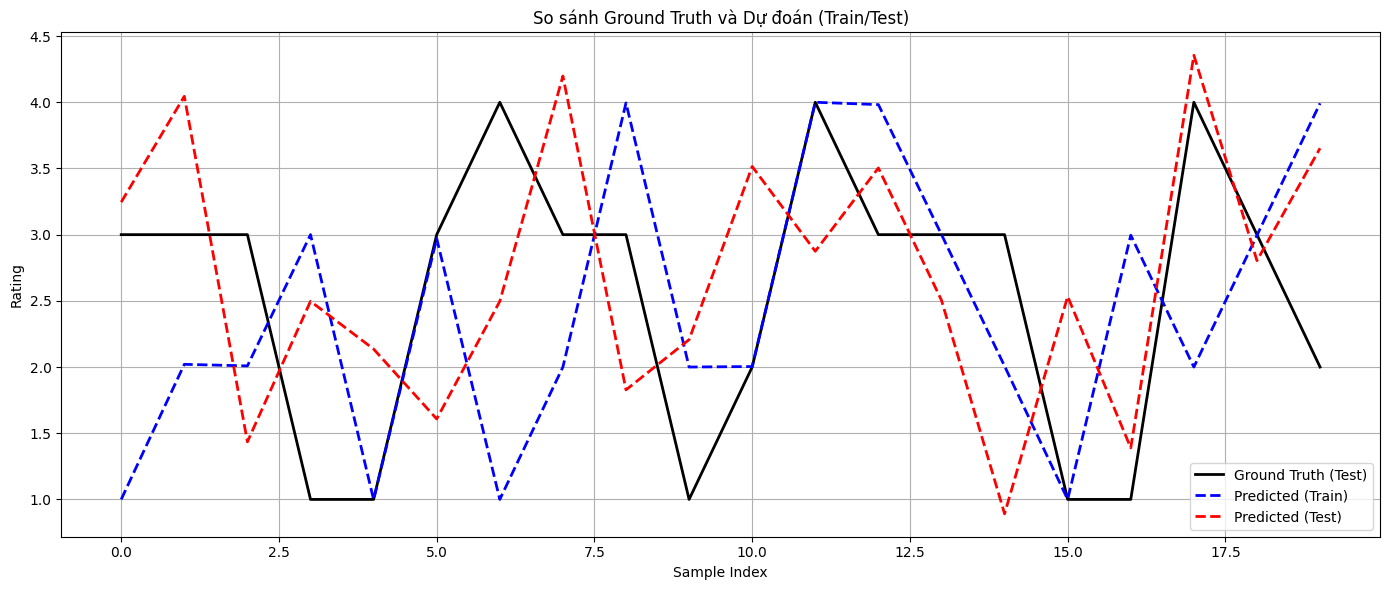

In [18]:
plot_three_lines(pd_train, pd_test, n_samples=20)

In [9]:
def find_best_k(model, sparse, k_range=range(1, 21)):
    rmses = []
    ks = list(k_range)

    for k in ks:
        _, _, rmse, _ = model.evaluate(sparse, k=k)
        rmses.append(rmse)
        print(f"k = {k}, RMSE = {rmse:.4f}")

    # Tìm k tốt nhất
    best_k = ks[int(np.argmin(rmses))]
    print(f"\n✅ Best k = {best_k} with RMSE = {min(rmses):.4f}")
    return ks, best_k, rmses

In [11]:
ks, best_k, rmse_list = find_best_k(model, test_sparse, k_range=range(1, 31, 2))

k = 1, RMSE = 1.5412
k = 3, RMSE = 1.5091
k = 5, RMSE = 1.5083
k = 7, RMSE = 1.5082
k = 9, RMSE = 1.5081
k = 11, RMSE = 1.5081
k = 13, RMSE = 1.5081
k = 15, RMSE = 1.5081
k = 17, RMSE = 1.5081
k = 19, RMSE = 1.5081
k = 21, RMSE = 1.5081
k = 23, RMSE = 1.5081
k = 25, RMSE = 1.5081
k = 27, RMSE = 1.5081
k = 29, RMSE = 1.5081

✅ Best k = 21 with RMSE = 1.5081


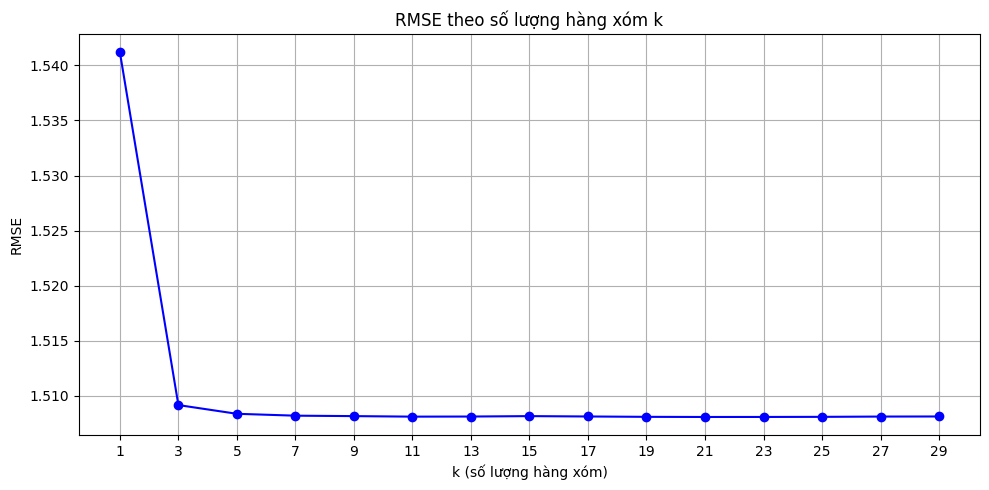

In [12]:
 # Vẽ biểu đồ
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(ks, rmse_list, marker='o', linestyle='-', color='blue')
plt.title('RMSE theo số lượng hàng xóm k')
plt.xlabel('k (số lượng hàng xóm)')
plt.ylabel('RMSE')
plt.xticks(ks)
plt.grid(True)
plt.tight_layout()
plt.show()